In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/danielluo/Downloads/crime-in-vancouver/crime.csv')
data['counter'] = 1

def categorize(crime):
    if 'Theft' in crime:
        return "Theft"
    elif 'Break' in crime:
        return 'Break and Enter'
    elif 'Collision' in crime:
        return 'Vehicle Collision'
    else:
        return 'Others'

categories=['Theft', 'Break and Enter', 'Vehicle Collision', 'Others']    

data['CATEGORY'] = data['TYPE'].apply(categorize)

In [2]:
neighbourhoods_alpha = pd.Series(pd.unique(data.NEIGHBOURHOOD)).sort_values().reset_index().iloc[:,1]

neighbourhood_areas = pd.Series([370,
370,
856,
327,
445,
793,
724,
631,
664,
546,
559,
366,
125,
401,
805,
491,
446,
217,
405,
388,
626,
531,
198,
445,
0])

neighbourhood_pops2016 = pd.Series([15295, 62030, 21425, 33620, 29175, 34575, 49325, 13975, 29325, 43045, 24460, 32955, 2300, 13030, 51530, 22555, 8430, 7970, 0, 12585, 36500, 31065, 47200, 13065, 0])

In [3]:
area_neighbourhood = pd.concat([neighbourhoods_alpha, neighbourhood_areas], axis=1, keys = ['NEIGHBOURHOOD', 'AREA']).set_index('NEIGHBOURHOOD')
area_neighbourhood

pop_neighbourhood = pd.concat([neighbourhoods_alpha, neighbourhood_pops2016], axis=1, keys = ['NEIGHBOURHOOD','POPULATION']).set_index('NEIGHBOURHOOD')
pop_neighbourhood

,POPULATION
NEIGHBOURHOOD,
Arbutus Ridge,15295
Central Business District,62030
Dunbar-Southlands,21425
Fairview,33620
Grandview-Woodland,29175
Hastings-Sunrise,34575
Kensington-Cedar Cottage,49325
Kerrisdale,13975
Killarney,29325


In [4]:
crimes = pd.unique(data.TYPE)
known_crimes = crimes[crimes != 'Homicide']
known_crimes = known_crimes[known_crimes != 'Offence Against a Person']

neighbourhoods_interest = ['Strathcona', 'Central Business District', 'West Point Grey', 'Mount Pleasant']
neighbourhoods_interestedin = data[data.NEIGHBOURHOOD.isin(neighbourhoods_interest)]

In [5]:
def plot_density(data, crime_type, time_interval, neighbourhoods):
    subset = data[data.TYPE == crime_type]
    time_density_neighbourhood = pd.pivot_table(subset, values = 'counter', index = 'NEIGHBOURHOOD', columns = time_interval, aggfunc = 'sum').divide(area_neighbourhood.AREA, axis=0).T[neighbourhoods]
    ax = time_density_neighbourhood.plot(title="Crime Density through the Years: " + str(crime_type))
    ax.get_legend().set_bbox_to_anchor((1, 1))
    
def plot_per_cap(data, crime_type, time_interval, neighbourhoods):
    subset = data[data.TYPE == crime_type]
    time_density_neighbourhood = pd.pivot_table(subset, values = 'counter', index = 'NEIGHBOURHOOD', columns = time_interval, aggfunc = 'sum').divide(pop_neighbourhood.POPULATION, axis=0).T[neighbourhoods]
    ax = time_density_neighbourhood.plot(title="Crime Density through the Years: " + str(crime_type))
    ax.get_legend().set_bbox_to_anchor((1, 1))

## Crime Density by Year

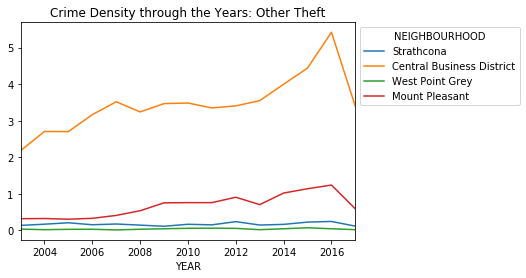

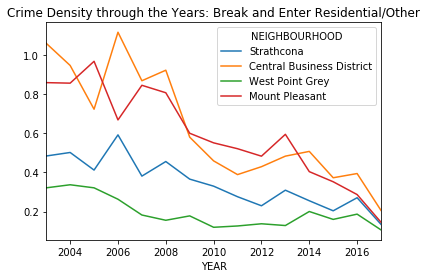

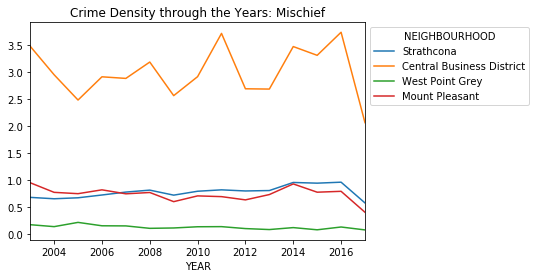

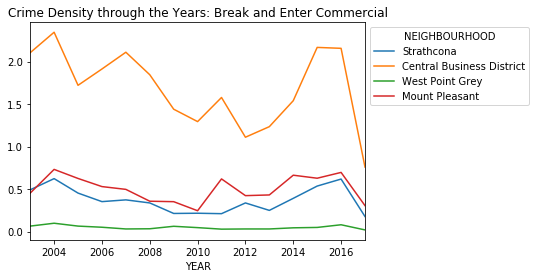

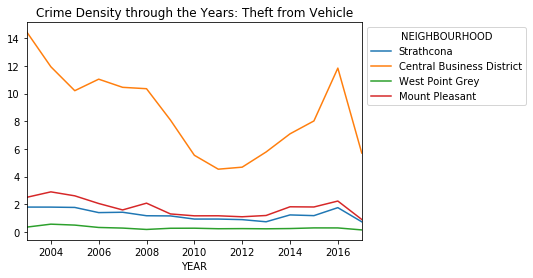

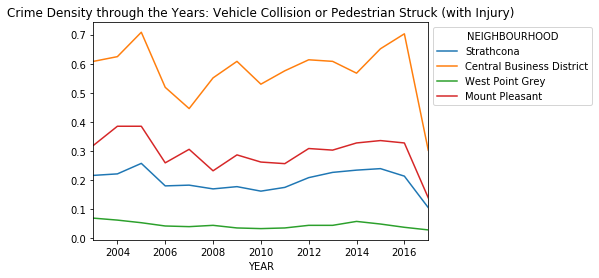

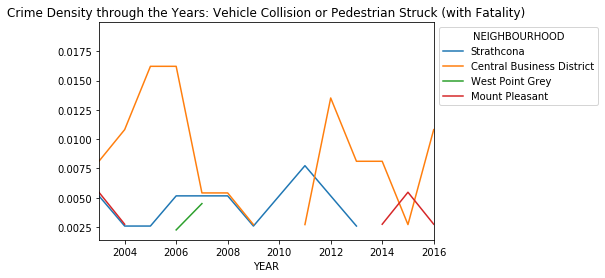

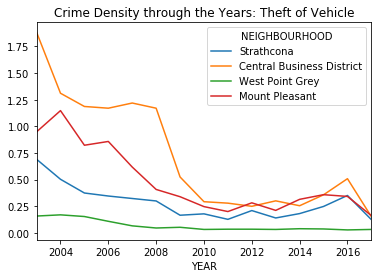

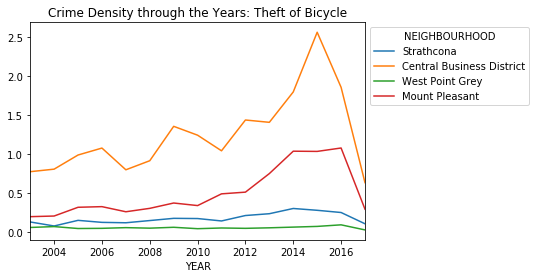

In [6]:
for crime in known_crimes:
    plot_density(neighbourhoods_interestedin, crime, 'YEAR', neighbourhoods_interest)

## Crime per Cap by Year

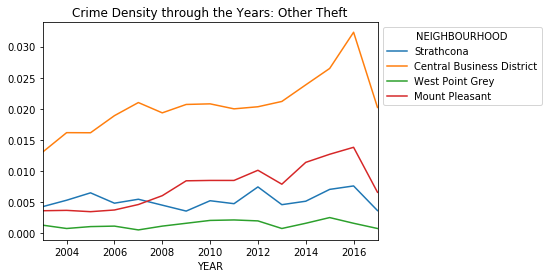

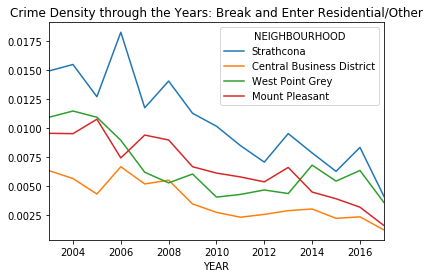

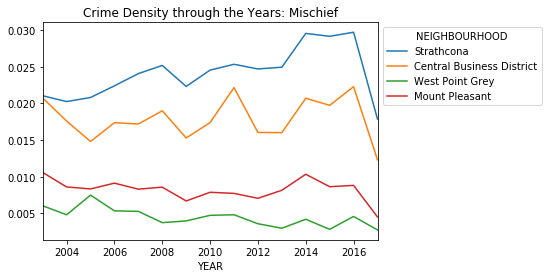

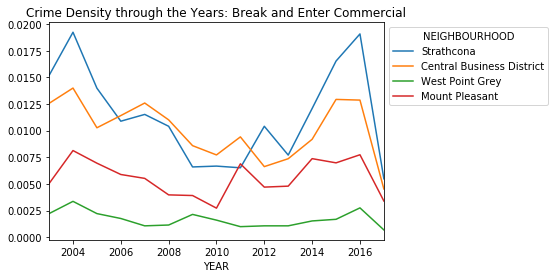

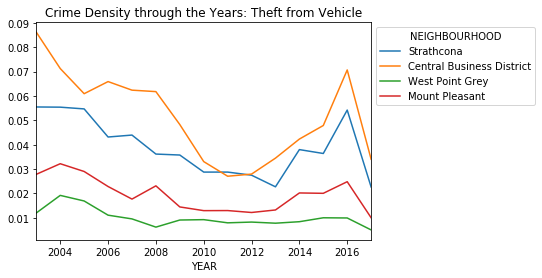

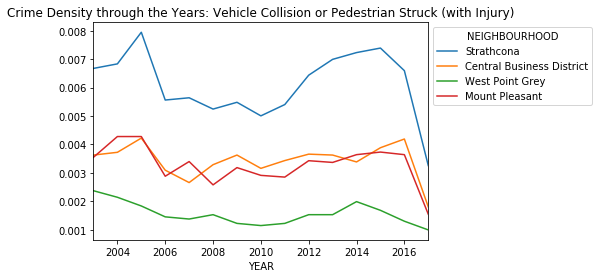

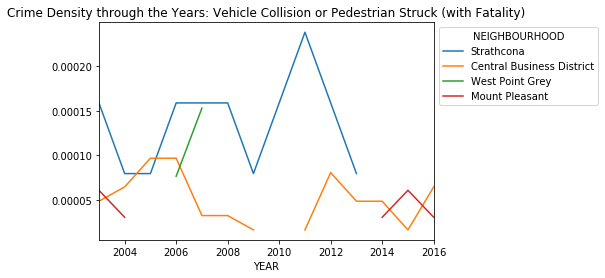

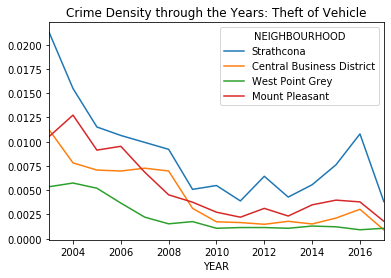

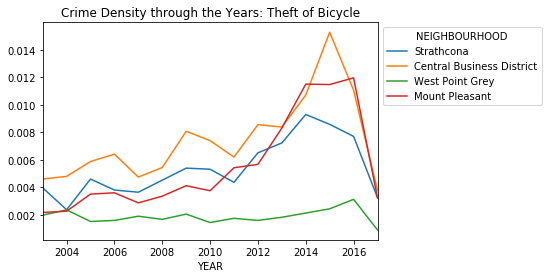

In [7]:
for crime in known_crimes:
    plot_per_cap(neighbourhoods_interestedin, crime, 'YEAR', neighbourhoods_interest)

## Crime Density by Month

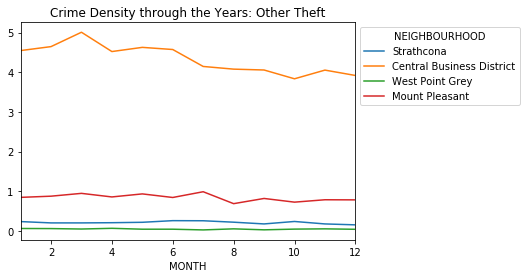

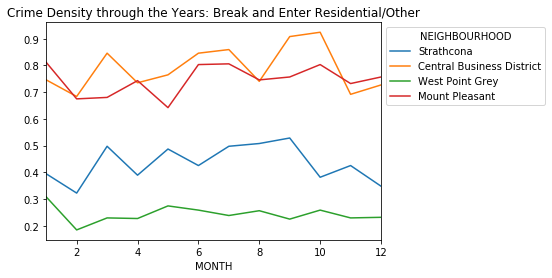

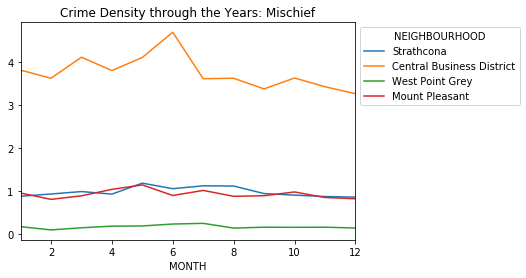

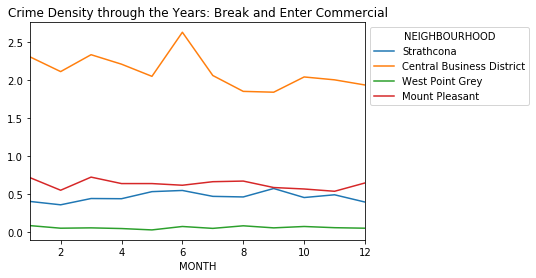

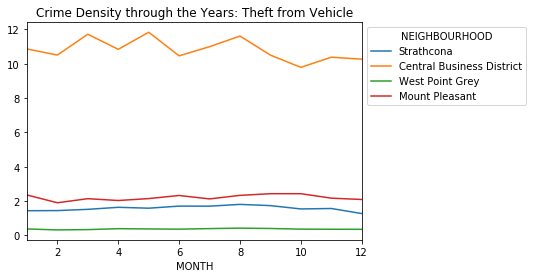

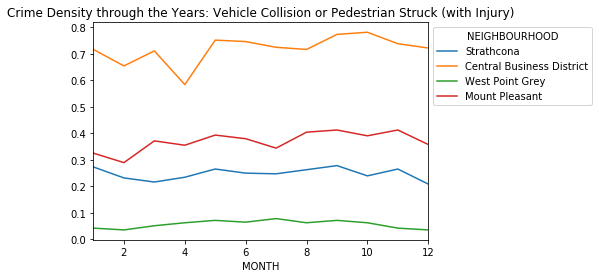

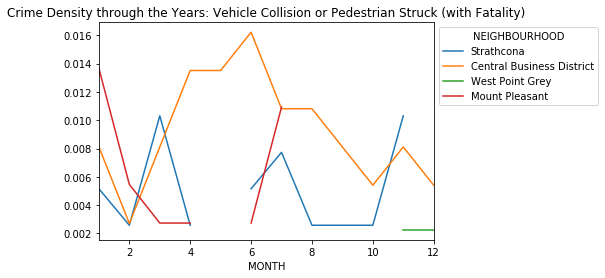

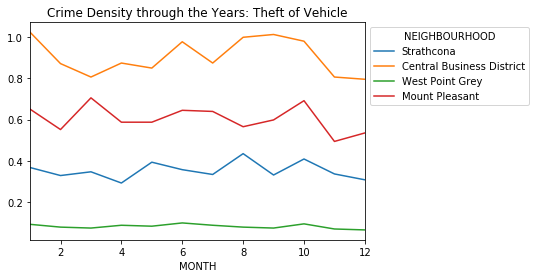

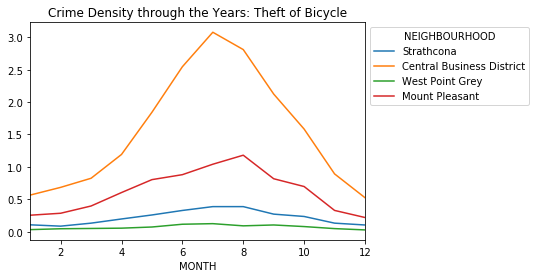

In [8]:
for crime in known_crimes:
    plot_density(neighbourhoods_interestedin, crime, 'MONTH', neighbourhoods_interest)

## Crime per Cap by Month

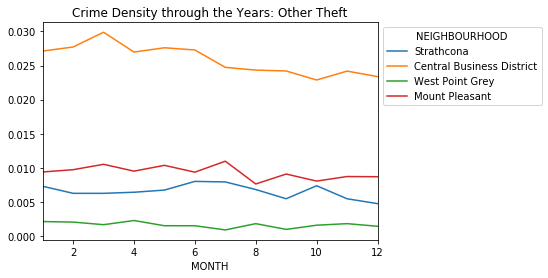

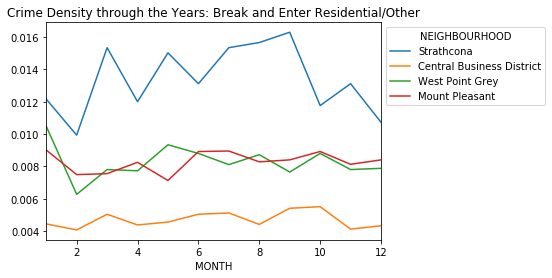

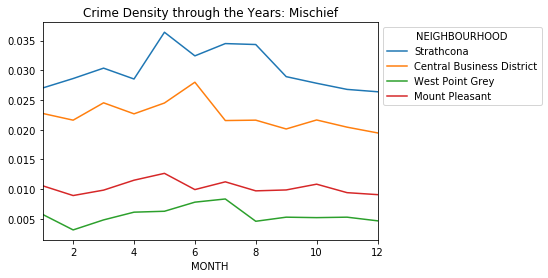

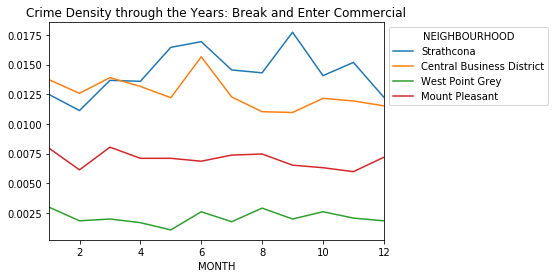

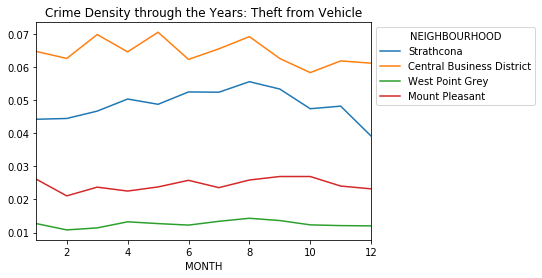

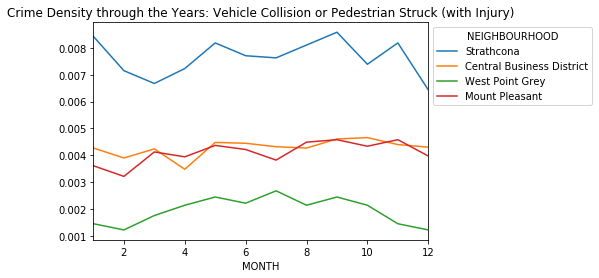

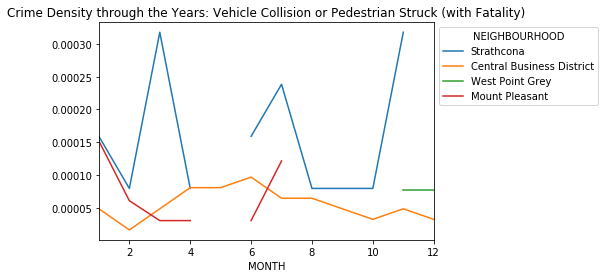

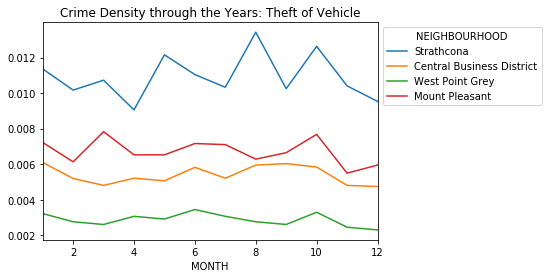

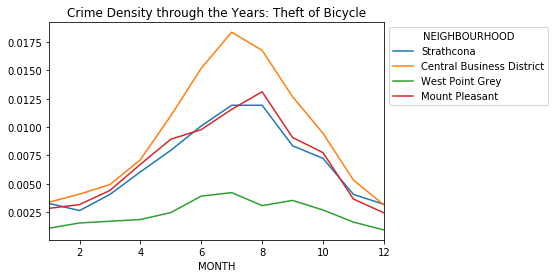

In [9]:
for crime in known_crimes:
    plot_per_cap(neighbourhoods_interestedin, crime, 'MONTH', neighbourhoods_interest)

## Crime Density by Hour

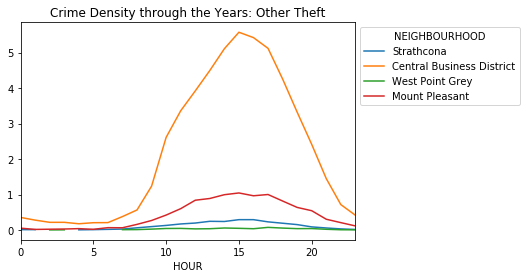

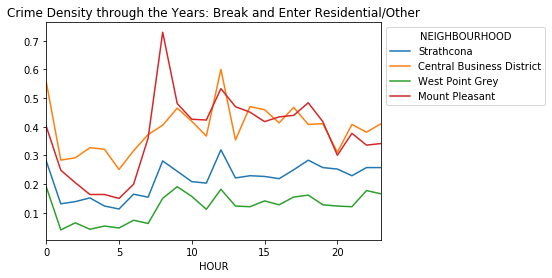

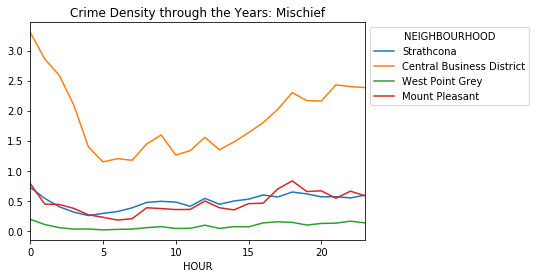

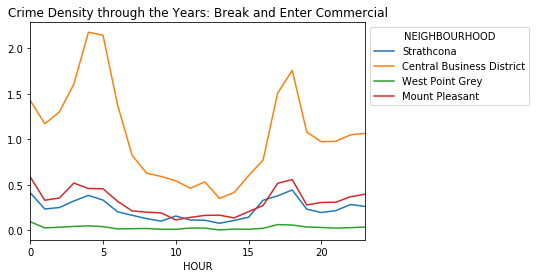

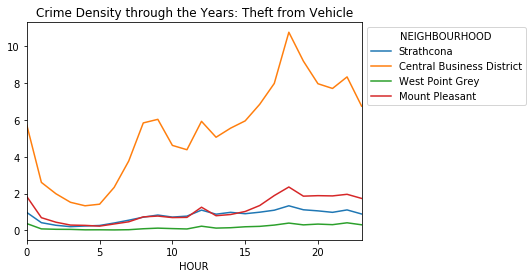

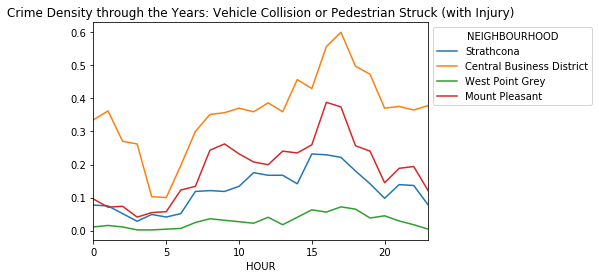

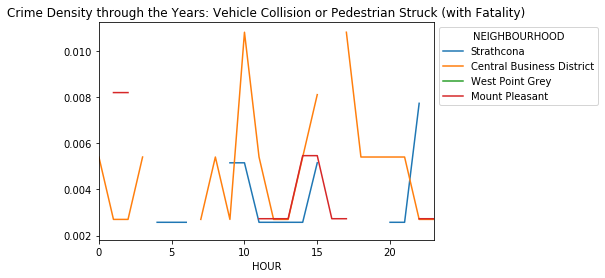

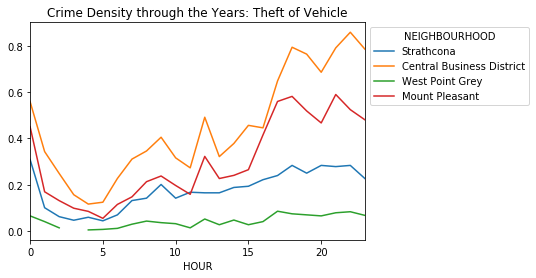

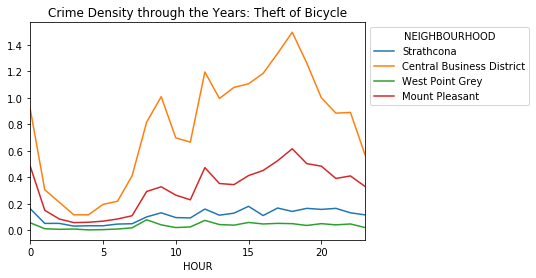

In [10]:
for crime in known_crimes:
    plot_density(neighbourhoods_interestedin, crime, 'HOUR', neighbourhoods_interest)

## Crime per Cap by Hour

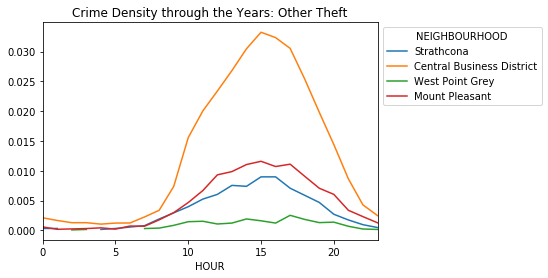

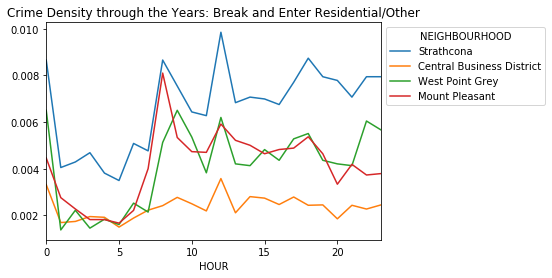

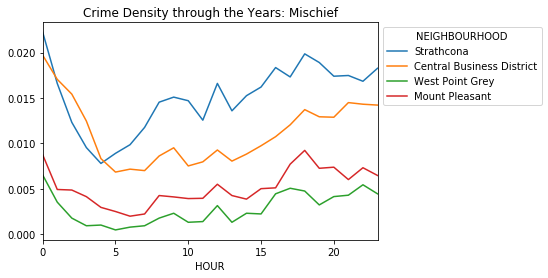

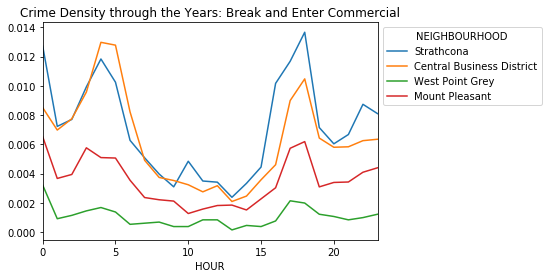

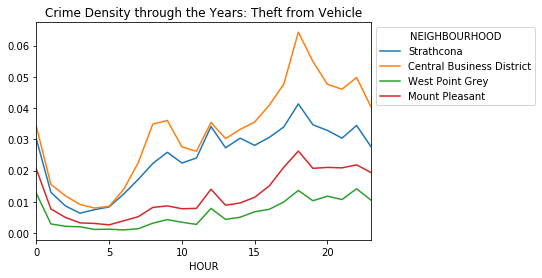

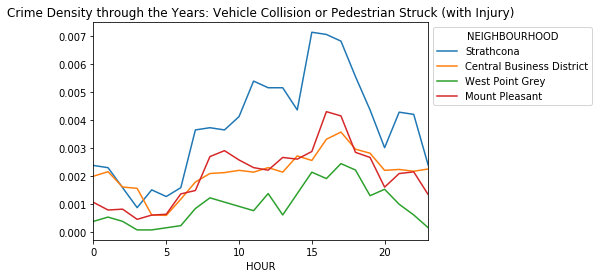

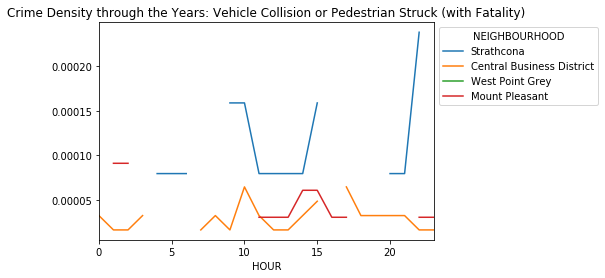

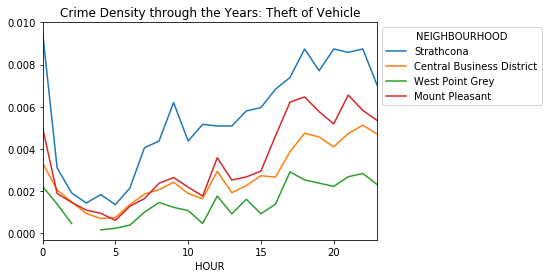

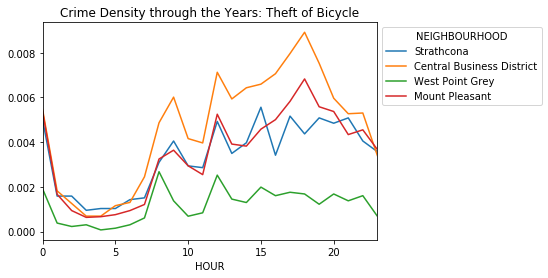

In [11]:
for crime in known_crimes:
    plot_per_cap(neighbourhoods_interestedin, crime, 'HOUR', neighbourhoods_interest)

## Seaborn Subplots

Text(0.5, 1.0, 'Mount Pleasant')

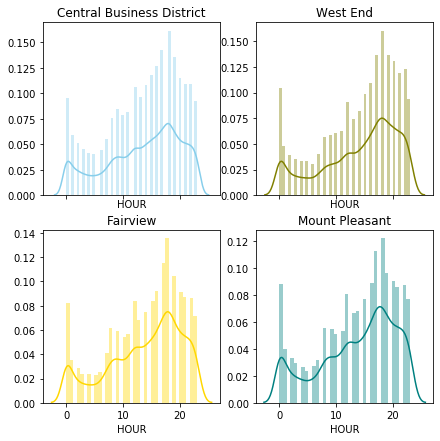

In [12]:
df = data[['HOUR', 'NEIGHBOURHOOD']]
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df[df.NEIGHBOURHOOD == "Central Business District"].HOUR , color="skyblue", ax=axes[0, 0]).set_title('Central Business District')
sns.distplot( df[df.NEIGHBOURHOOD == "West End"].HOUR , color="olive", ax=axes[0, 1]).set_title('West End')
sns.distplot( df[df.NEIGHBOURHOOD == "Fairview"].HOUR , color="gold", ax=axes[1, 0]).set_title('Fairview')
sns.distplot( df[df.NEIGHBOURHOOD == "Mount Pleasant"].HOUR , color="teal", ax=axes[1, 1]).set_title('Mount Pleasant')

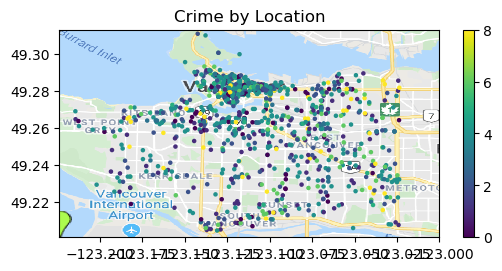

In [13]:
cleaned = data[data.Longitude != 0]
cleaned = cleaned[cleaned.Longitude > -123.797726]
cleaned = cleaned[cleaned.Latitude > 49.118175]

cleaned.TYPE = cleaned.TYPE.astype('category').cat.codes
cleaned.NEIGHBOURHOOD = cleaned.NEIGHBOURHOOD.astype('category').cat.codes

from matplotlib.pyplot import figure
figure(num=None, figsize=(6.13,2.75), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/vancouverpic2.png', 0)
# crop to 723
img_cropped = img[:,:726,:]
plt.imshow(img_cropped, zorder=0, aspect = 'auto',extent=[-123.223955, -123, 49.20089685,49.31334872])
sample = cleaned.sample(1000)

sample = cleaned.sample(1000)

plt.scatter(sample['Longitude'],sample['Latitude'], c = sample['TYPE'], s = 5)
plt.colorbar()
plt.title("Crime by Location")
plt.show()

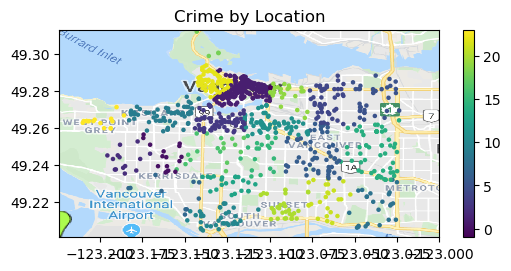

In [14]:
figure(num=None, figsize=(6.13,2.75), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/vancouverpic2.png', 0)
# crop to 723
img_cropped = img[:,:726,:]
plt.imshow(img_cropped, zorder=0, aspect = 'auto',extent=[-123.223955, -123, 49.20089685,49.31334872])
sample = cleaned.sample(1000)

plt.scatter(sample['Longitude'],sample['Latitude'], c = sample['NEIGHBOURHOOD'], s = 5)
plt.colorbar()
plt.title("Crime by Location")
plt.show()

## Categorization of Crimes

I'll consolidate some of the crimes here

In [15]:

data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,counter,CATEGORY
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,Theft
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,Theft
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,Theft
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,Theft
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1,Theft


In [16]:
def plot_density(data, crime_type, time_interval, neighbourhoods):
    subset = data[data.CATEGORY == crime_type]
    time_density_neighbourhood = pd.pivot_table(subset, values = 'counter', index = 'NEIGHBOURHOOD', columns = time_interval, aggfunc = 'sum').divide(area_neighbourhood.AREA, axis=0).T[neighbourhoods]
    ax = time_density_neighbourhood.plot(title="Crime Density through the Years: " + str(crime_type))
    ax.get_legend().set_bbox_to_anchor((1, 1))
    
def plot_per_cap(data, crime_type, time_interval, neighbourhoods):
    subset = data[data.CATEGORY == crime_type]
    time_density_neighbourhood = pd.pivot_table(subset, values = 'counter', index = 'NEIGHBOURHOOD', columns = time_interval, aggfunc = 'sum').divide(pop_neighbourhood.POPULATION, axis=0).T[neighbourhoods]
    ax = time_density_neighbourhood.plot(title="Crime Density through the Years: " + str(crime_type))
    ax.get_legend().set_bbox_to_anchor((1, 1))



## Yearly Density

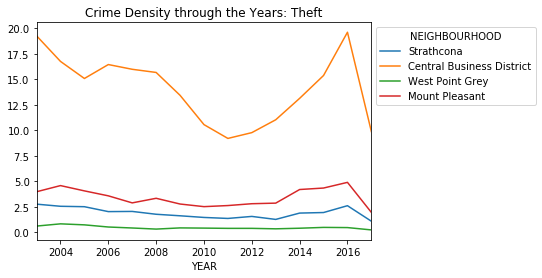

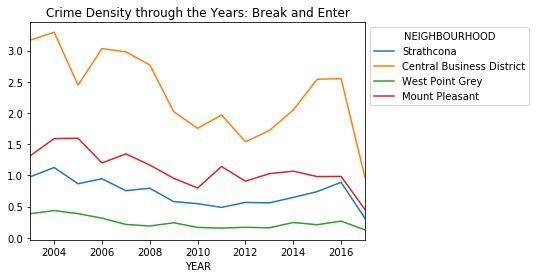

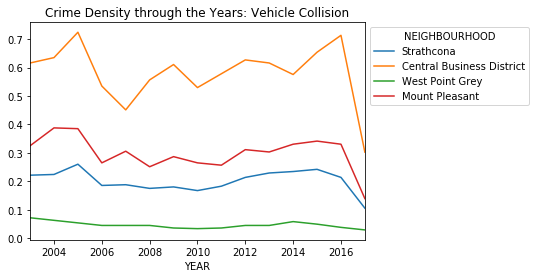

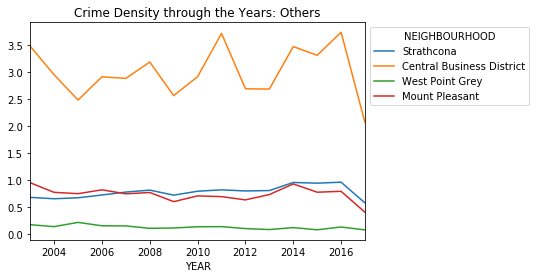

In [17]:
for crime in categories:
    plot_density(neighbourhoods_interestedin, crime, 'YEAR', neighbourhoods_interest)

## Yearly per Cap

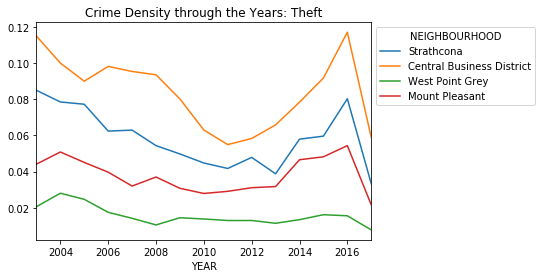

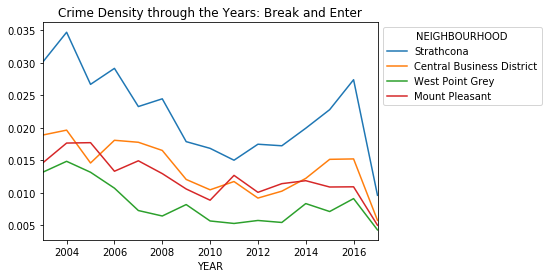

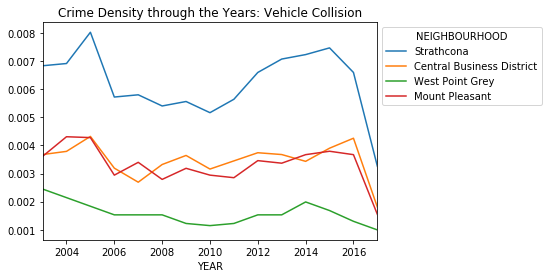

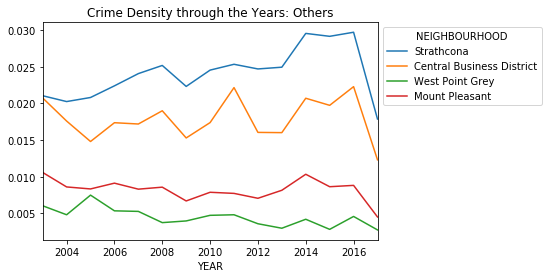

In [18]:
for crime in categories:
    plot_per_cap(neighbourhoods_interestedin, crime, 'YEAR', neighbourhoods_interest)

## Monthly Density

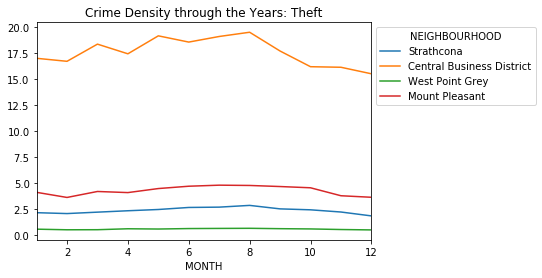

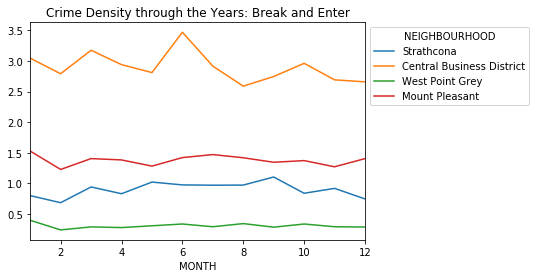

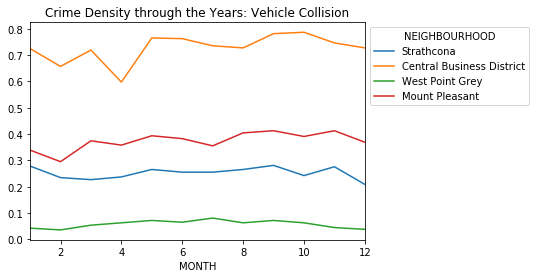

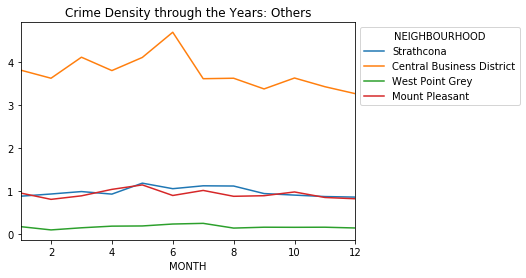

In [19]:
for crime in categories:
    plot_density(neighbourhoods_interestedin, crime, 'MONTH', neighbourhoods_interest)

## Monthly per Cap

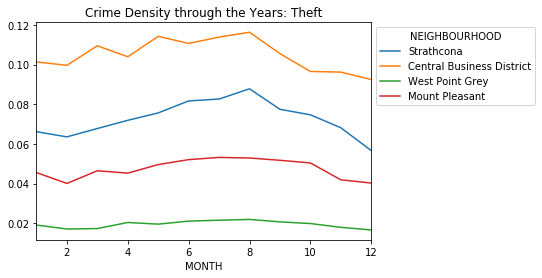

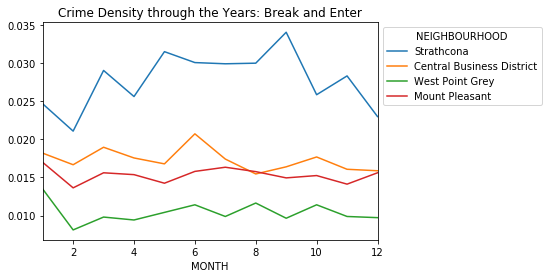

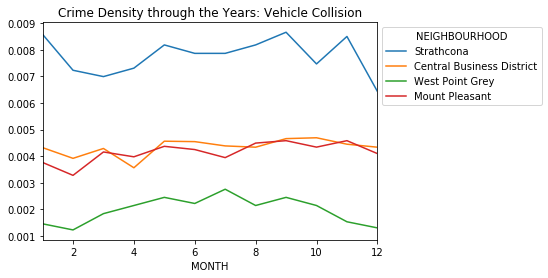

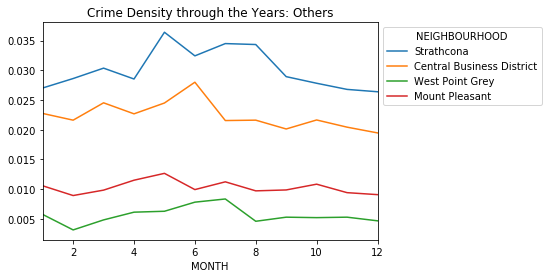

In [20]:
for crime in categories:
    plot_per_cap(neighbourhoods_interestedin, crime, 'MONTH', neighbourhoods_interest)

## Hourly Density

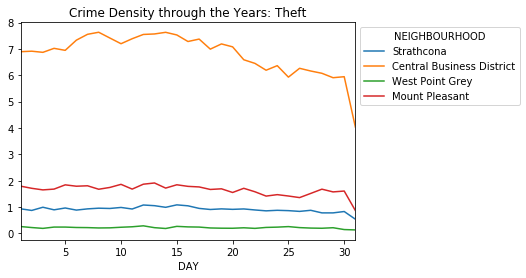

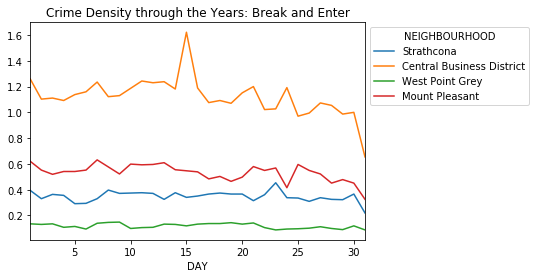

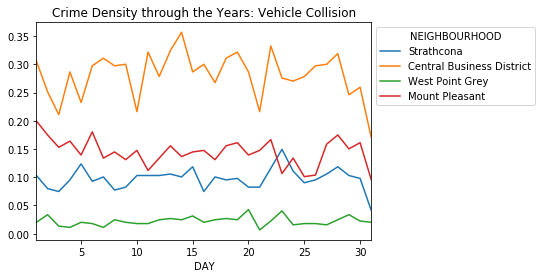

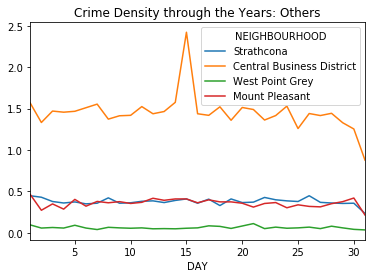

In [21]:
for crime in categories:
    plot_density(neighbourhoods_interestedin, crime, 'DAY', neighbourhoods_interest)

## Hourly per Cap

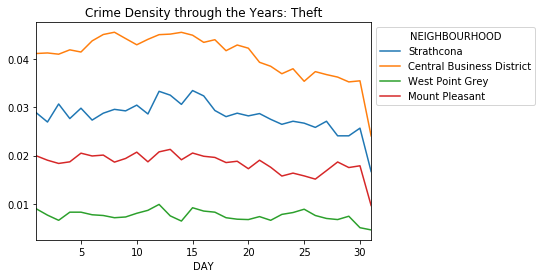

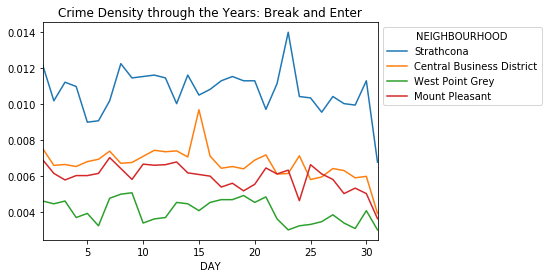

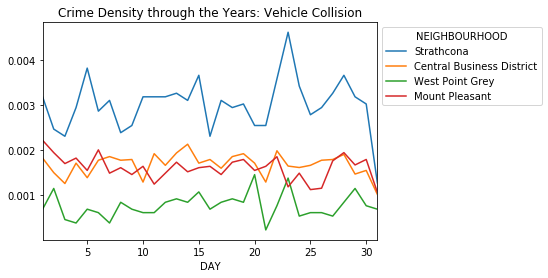

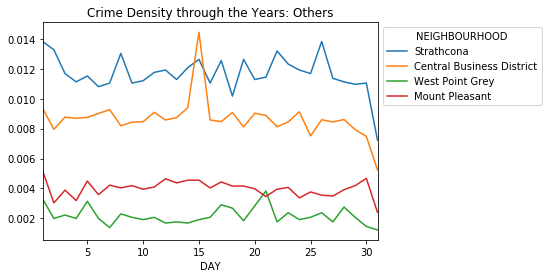

In [22]:
for crime in categories:
    plot_per_cap(neighbourhoods_interestedin, crime, 'DAY', neighbourhoods_interest)